In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline
sns.set(style="darkgrid")

UsageError: Line magic function `%matplotlib.inline` not found.


In [516]:
netflix_df=pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Null Data

<AxesSubplot:>

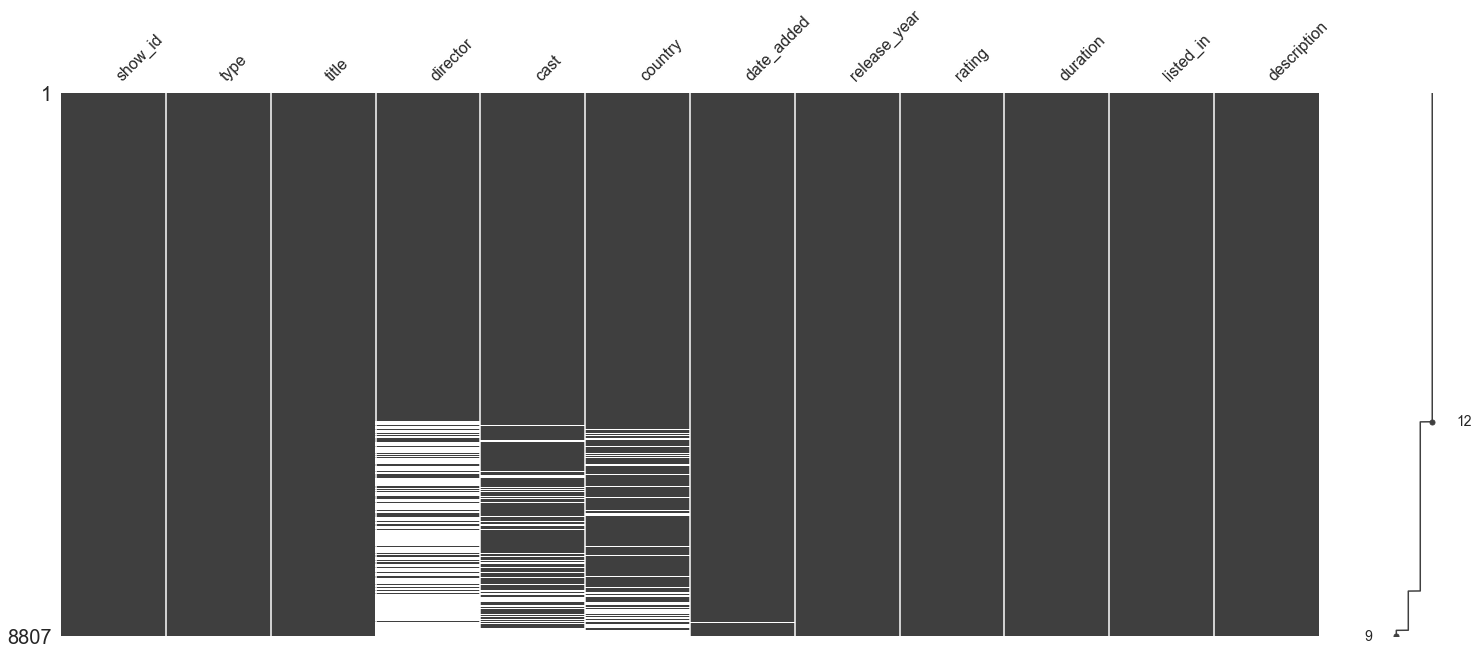

In [517]:
import missingno as msno

msno.matrix(netflix_df,sort='descending')


In [518]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [519]:
    netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [520]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [521]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

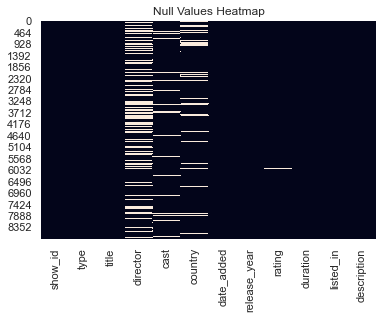

In [522]:
sns.heatmap(netflix_df.isnull(),cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [523]:
netflix_df['director'].fillna('No Director',inplace=True)
netflix_df['cast'].fillna('No Cast',inplace=True)
netflix_df['country'].fillna('Country Unavailable',inplace=True)

netflix_df.dropna(subset=['date_added','rating','duration'],inplace=True)


In [524]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [525]:
is_movie =netflix_df['type']=='Movie'
movie_df=netflix_df[is_movie]
tv_show_df=netflix_df[~is_movie]

assert movie_df.shape[0] +tv_show_df.shape[0] ==netflix_df.shape[0]

In [526]:
movie_df.duration = movie_df.duration.str.replace('min','').astype(int)
tv_show_df.rename(columns={'duration':'seasons'}, inplace=True)
tv_show_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_show_df.seasons= tv_show_df.seasons.str.replace('Seasons','').astype(int)

C:\Users\Sameh farouk\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Sameh farouk\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Sameh farouk\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

# Analysis of Movies vs TV Shows.

C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


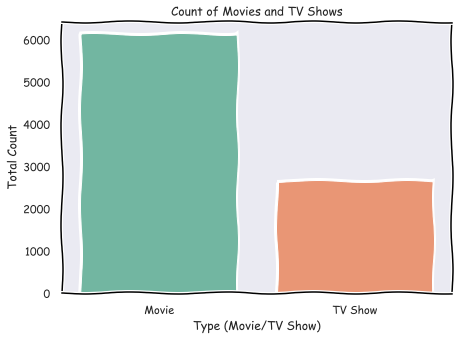

In [527]:
import matplotlib
#matplotlib.font_manager._rebuild()
with plt.xkcd():
    plt.figure(figsize=(7,5))
    sns.countplot(netflix_df.type ,palette='Set2')
    plt.title("Count of Movies and TV Shows")
    plt.xlabel("Type (Movie/TV Show)")
    plt.ylabel("Total Count")
    plt.show()

### It is evident that there are more Movies on Netflix than TV shows.



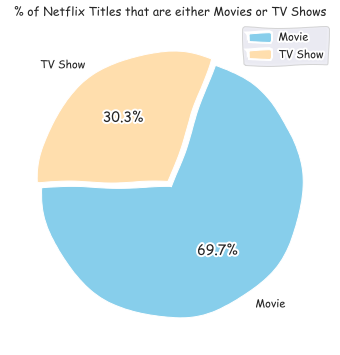

In [528]:
with plt.xkcd():
    plt.figure(figsize=(12,6))
    plt.title("% of Netflix Titles that are either Movies or TV Shows")
    plt.pie(netflix_df.type.value_counts(),labels=netflix_df.type.value_counts().index,explode=(0.025,.025),colors=['skyblue','navajowhite'],autopct='%1.1f%%',startangle=180)
    plt.legend()
    plt.show()

# Movie ratings analysis

C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


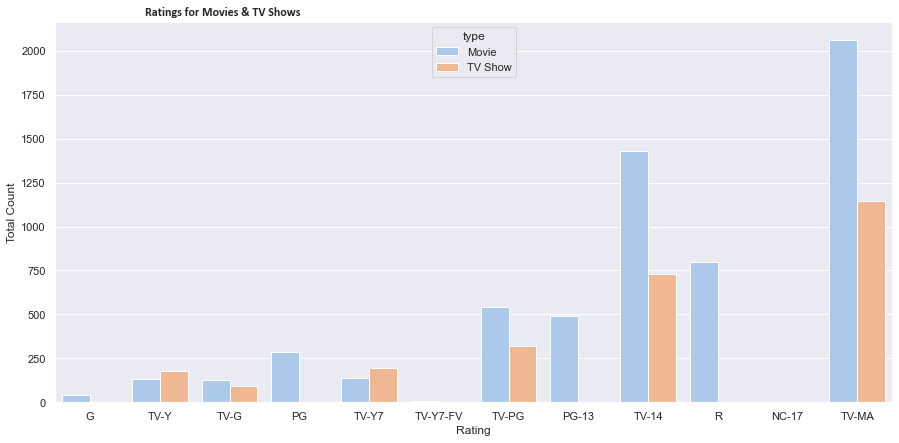

In [529]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.countplot(netflix_df.rating , order=order , hue=netflix_df.type,palette='pastel')
plt.title("Ratings for Movies & TV Shows",fontsize=12 ,fontweight='bold',fontfamily='calibri',position=(.20,.1+.02))
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-530-0fe342138854>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


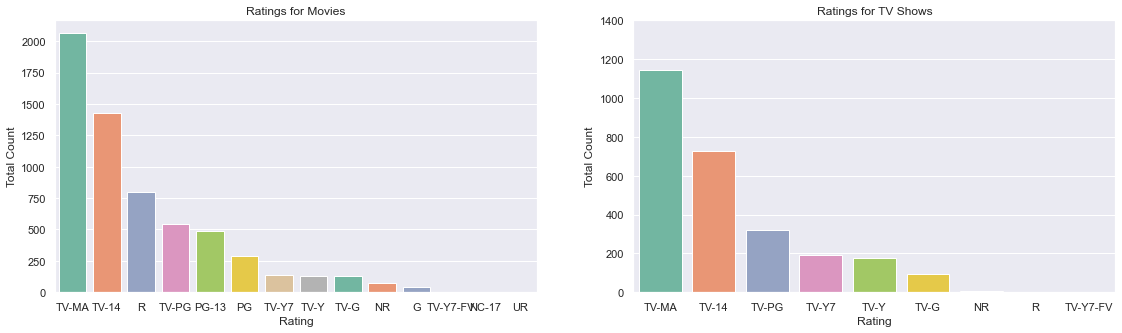

In [530]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1=sns.countplot(movie_df.rating , order=movie_df.rating.value_counts().index[:15] ,palette='Set2',ax=ax[0])
g1.set_title('Ratings for Movies')
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2=sns.countplot(tv_show_df.rating , order=tv_show_df.rating.value_counts().index[:15] ,palette='Set2',ax=ax[1])
g2.set(yticks=np.arange(0,1600,200))
g2.set_title('Ratings for TV Shows')
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

For Movie:

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".



In [531]:
netflix_df.date_added=pd.to_datetime(netflix_df.date_added,infer_datetime_format=True,errors='raise')
movie_df.date_added=pd.to_datetime(movie_df.date_added,infer_datetime_format=True,errors='coerce')
tv_show_df.date_added=pd.to_datetime(tv_show_df.date_added,infer_datetime_format=True,errors='coerce')

netflix_df['year_added']=netflix_df.date_added.dt.year
movie_df['year_added']=movie_df.date_added.dt.year
tv_show_df['year_added']=tv_show_df.date_added.dt.year

netflix_df['month_added']=netflix_df.date_added.dt.month
movie_df['month_added']=movie_df.date_added.dt.month
tv_show_df['month_added']=tv_show_df.date_added.dt.month

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int64         
 13  month_added   8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.3+ MB


C:\Users\Sameh farouk\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-531-86ac1934dc92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['year_added']=movie_df.date_added.dt.year
<ipython-input-531-86ac1934dc92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [532]:
netflix_year =netflix_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})
netflix_year

,year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [533]:
netflix_sample=netflix_df[['type','year_added']]
movie_sample =netflix_sample[netflix_sample['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
tv_show_sample =netflix_sample[netflix_sample.type == 'TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
tv_show_sample

,year,count
0,2020,595
1,2019,592
2,2021,505
3,2018,411
4,2017,349
5,2016,175
6,2015,26
7,2014,5
8,2013,5
9,2008,1


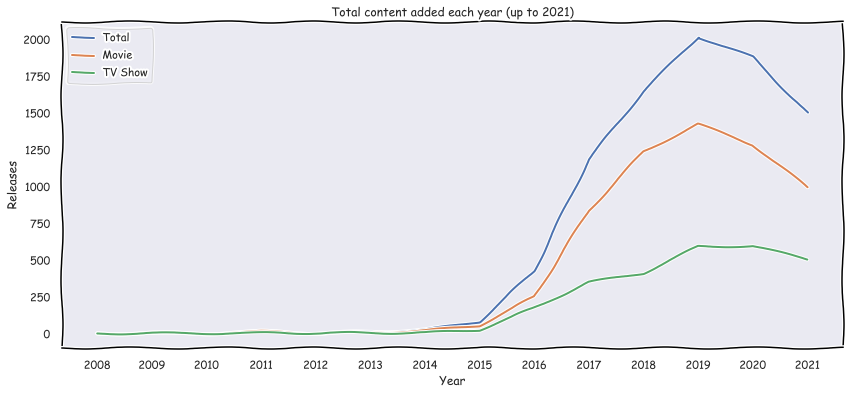

In [534]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.lineplot(data=netflix_year, x='year', y='count')
    sns.lineplot(data=movie_sample, x='year', y='count')
    sns.lineplot(data=tv_show_sample, x='year', y='count')
    ax.set_xticks(np.arange(2008, 2022, 1))
    plt.title("Total content added each year (up to 2021)")
    plt.legend(['Total','Movie','TV Show'])
    plt.ylabel("Releases")
    plt.xlabel("Year")
    plt.show()

In [535]:
hetmap=netflix_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

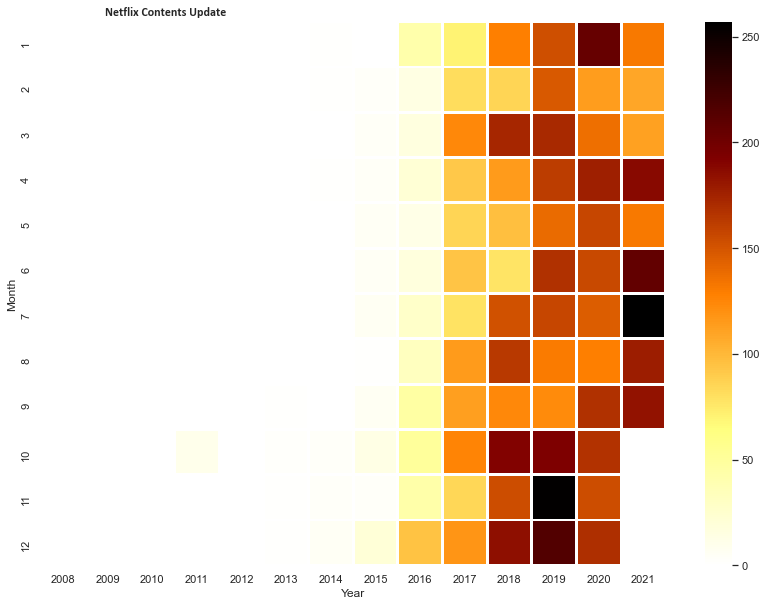

In [536]:
fig ,ax =plt.subplots(figsize=(14,10))
sns.heatmap(data=hetmap , edgecolors='white',linewidths=2,cmap="afmhot_r",)
plt.title("Netflix Contents Update", fontsize=12 ,fontweight='bold',fontfamily='calibri',position=(.20,1+.02))
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

#### If the latest year 2019 is considered, 
#### January and Septemberwere the months when comparatively much less content was released.
#### Therefore, these months may be a good choice for the success of a new release!



C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-537-3fbb63f7c6dc>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


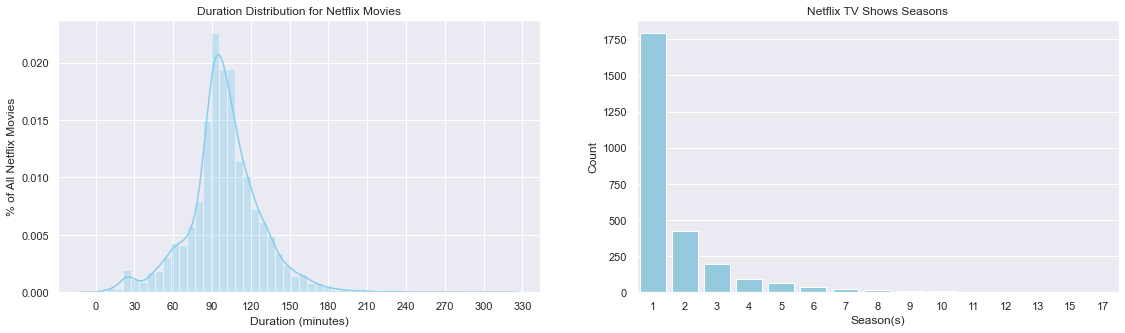

In [537]:
fig ,ax =plt.subplots(1,2,figsize=(19,5))
g1=sns.distplot(movie_df.duration , ax=ax[0],color='skyblue')
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2=sns.countplot(tv_show_df.seasons,ax=ax[1],color='skyblue')
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

In [538]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [539]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1,drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

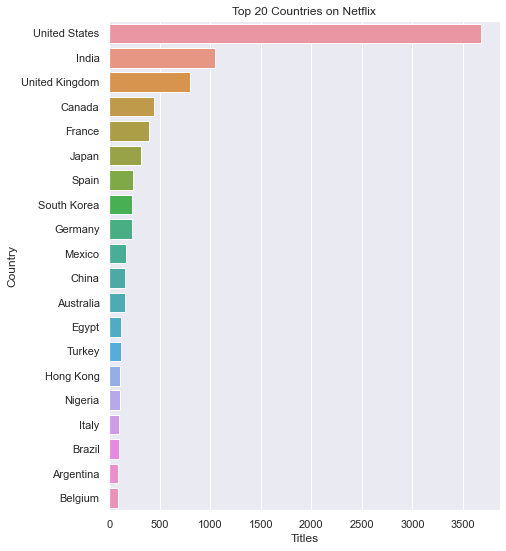

In [540]:
fig ,ax= plt.subplots(figsize=(7,9))
sns.countplot(y=filtered_countries,order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [541]:
cat_df=netflix_df.set_index('title').listed_in.str.split(',',expand=True).stack().reset_index(level=1 , drop=True)


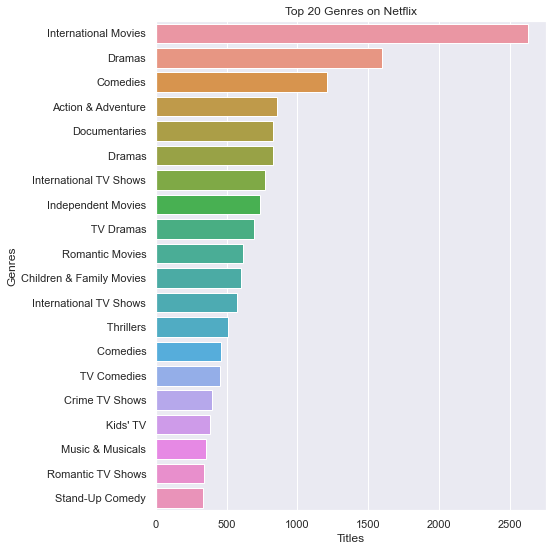

In [542]:
fig ,ax=plt.subplots(figsize=(7,9))
sns.countplot(y=cat_df,order=cat_df.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [543]:
dir_df=netflix_df[netflix_df.director !='No Director']
dir_df=dir_df.set_index('title').director.str.split(',',expand=True).stack().reset_index(level=1 , drop=True)

<AxesSubplot:xlabel='count'>

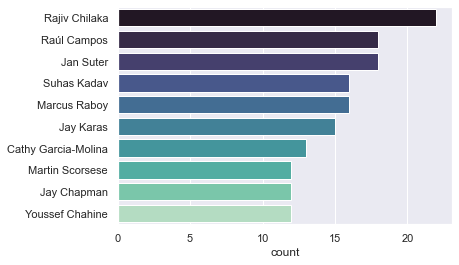

In [544]:
fig, ax=plt.subplots()
sns.countplot(y=dir_df , order=dir_df.value_counts().index[:10],palette='mako')

<AxesSubplot:xlabel='count'>

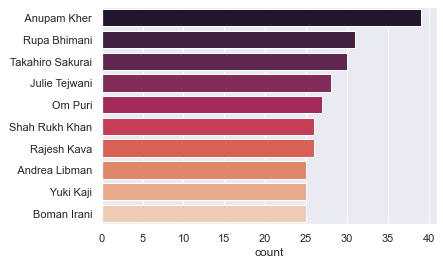

In [545]:
cast_df=netflix_df.set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1 ,drop=True)
cast_df=cast_df[cast_df !='No Cast']
sns.countplot(y=cast_df , order=cast_df.value_counts().index[:10],palette='rocket')

# import new data imdb

In [546]:
imdb_df =pd.read_csv('imdb_top_1000.csv')
imdb_df.head()
col_filter=['Poster_Link','Certificate','Overview','Star1','Star2','Star3']


In [547]:
imdb_df = imdb_df[imdb_df.columns[~imdb_df.columns.isin(col_filter)]]
imdb_df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,John Fiedler,689845,"4,360,000"


In [548]:
gener_df=imdb_df['Genre'].str.split(',',expand=True).stack().str.strip().reset_index(level=1,drop=True)

C:\Users\Sameh farouk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Gener in IMDB')

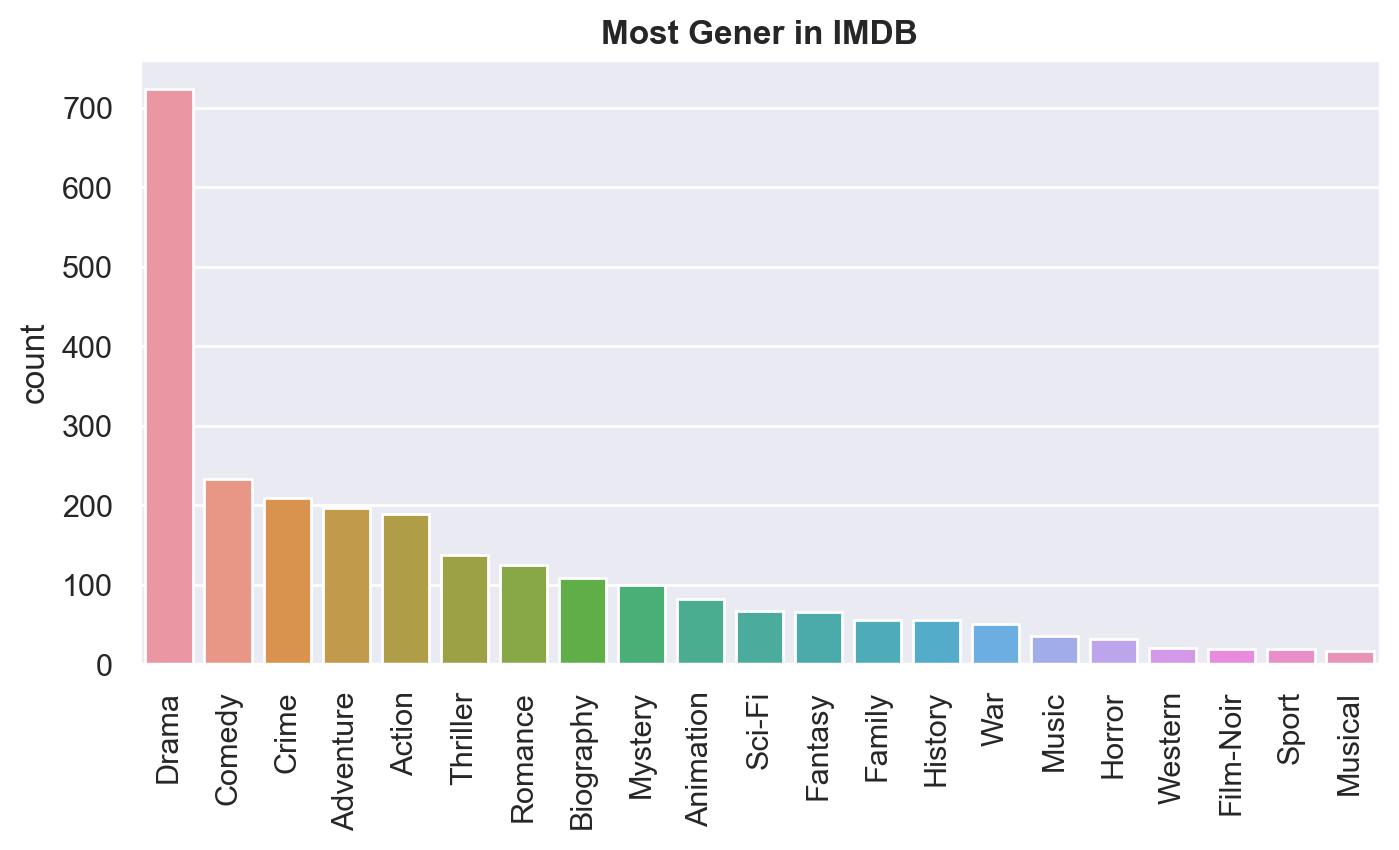

In [549]:
fig ,ax=plt.subplots(figsize=(8,4),dpi=200)
sns.countplot(gener_df,order=gener_df.value_counts().index)
plt.xticks(rotation=90)
ax.set_title('Most Gener in IMDB',fontweight='bold',fontsize=12)

<AxesSubplot:>

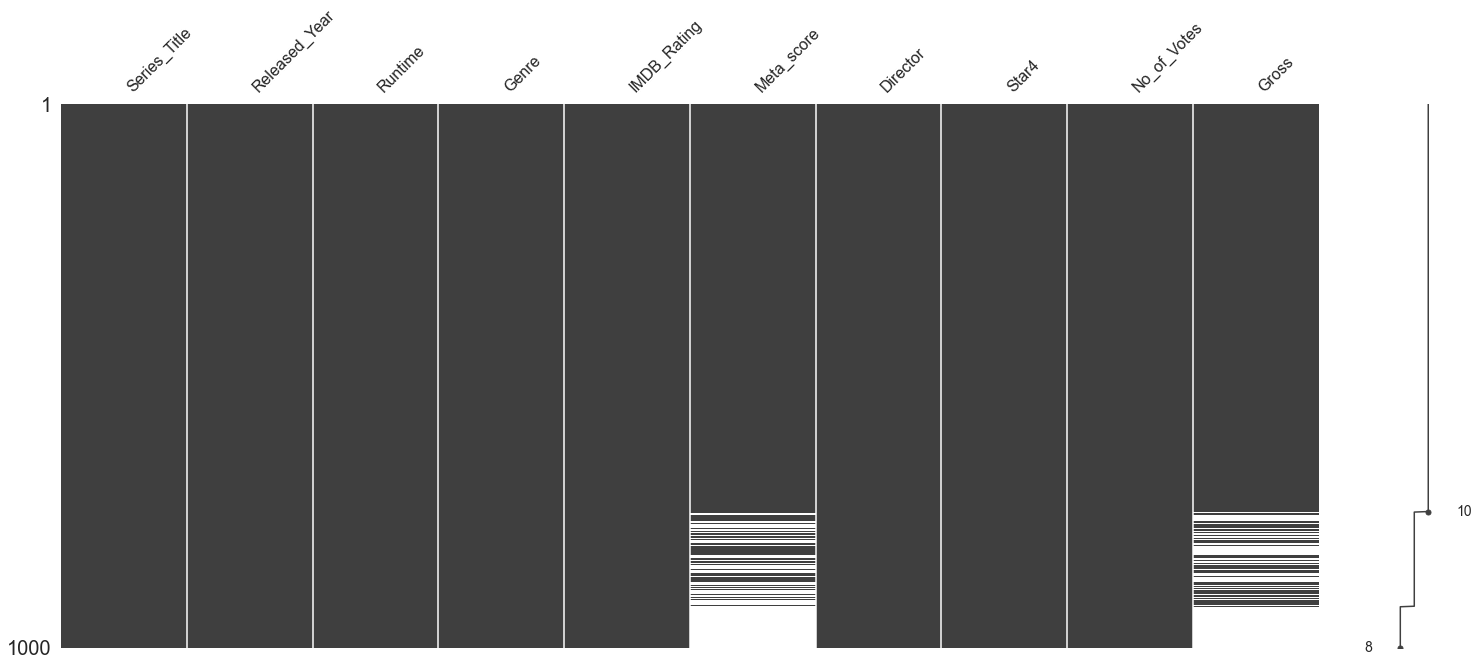

In [550]:
msno.matrix(imdb_df,sort='descending')

In [551]:
imdb_df=imdb_df.dropna(subset=['Meta_score','Gross'])
imdb_df.drop('Star4',inplace=True , axis=1)


In [552]:
imdb_df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


In [553]:
imdb_df.rename(columns={'Series_Title':'title'},inplace=True)
imdb_df.rename(columns={'IMDB_Rating':'rating'},inplace=True)

In [554]:
imdb_df.head()

,title,Released_Year,Runtime,Genre,rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


In [555]:
joindf=imdb_df.merge(netflix_df,left_on='title',right_on='title',how='inner')

In [556]:
srt_rt=joindf.sort_values('rating_x',ascending=False)
srt_rt[:10]

,title,Released_Year,Runtime,Genre,rating_x,Meta_score,Director,No_of_Votes,Gross,show_id,...,cast,country,date_added,release_year,rating_y,duration,listed_in,description,year_added,month_added
0,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,1642758,"377,845,905",s8405,...,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01,2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,2020,1
2,Schindler's List,1993,195 min,"Biography, Drama, History",8.9,94.0,Steven Spielberg,1213505,"96,898,818",s7958,...,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,2018,4
1,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,94.0,Quentin Tarantino,1826188,"107,928,762",s7803,...,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,2019,1
3,Inception,2010,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,2067042,"292,576,195",s341,...,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2021-08-01,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,2021,8
4,The Lord of the Rings: The Two Towers,2002,179 min,"Action, Adventure, Drama",8.7,87.0,Peter Jackson,1485555,"342,551,365",s8406,...,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01,2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,2020,1
5,The Matrix,1999,136 min,"Action, Sci-Fi",8.7,73.0,Lana Wachowski,1676426,"171,479,930",s8415,...,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,2019-11-01,1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,2019,11
9,The Pianist,2002,150 min,"Biography, Drama, Music",8.5,85.0,Roman Polanski,729603,"32,572,577",s1139,...,"Adrien Brody, Thomas Kretschmann, Frank Finlay...","United Kingdom, France, Poland, Germany, Unite...",2021-04-01,2002,R,149 min,"Dramas, Independent Movies, International Movies",Famed Polish pianist Wladyslaw Szpilman strugg...,2021,4
12,Psycho,1960,109 min,"Horror, Mystery, Thriller",8.5,97.0,Alfred Hitchcock,604211,"32,000,000",s2590,...,"Udhayanidhi Stalin, Aditi Rao Hydari, Nithya M...",India,2020-05-01,2020,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",As a visually impaired man attempts to rescue ...,2020,5
11,Once Upon a Time in the West,1968,165 min,Western,8.5,80.0,Sergio Leone,302844,"5,321,508",s7660,...,"Henry Fonda, Charles Bronson, Claudia Cardinal...","Italy, United States",2019-11-20,1968,PG-13,166 min,"Action & Adventure, Classic Movies, Internatio...","In this epic spaghetti Western, a flinty gunsl...",2019,11
10,American History X,1998,119 min,Drama,8.5,62.0,Tony Kaye,1034705,"6,719,864",s6144,...,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,2019-11-01,1998,R,119 min,Dramas,A neo-Nazi gets sent to prison for murder and ...,2019,11


In [557]:
#!pip install plotly
import plotly.express as px


In [558]:
top_country=joindf['country'].str.split(',',expand=True).stack().reset_index(level=1 ,drop=True).str.strip()
top_country.head()

0      New Zealand
0    United States
1    United States
2    United States
3    United States
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'France'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'Japan'),
  Text(12, 0, 'Country Unavailable'),
  Text(13, 0, 'Hong Kong'),
  Text(14, 0, 'East Germany'),
  Text(15, 0, 'Nigeria'),
  Text(16, 0, 'Mexico'),
  Text(17, 0, 'Singapore'),
  Text(18, 0, 'Liechtenstein'),
  Text(19, 0, 'Ireland'),
  Text(20, 0, 'West Germany'),
  Text(21, 0, 'Norway'),
  Text(22, 0, 'Philippines'),
  Text(23, 0, 'Bahamas'),
  Text(24, 0, 'Poland'),
  Text(25, 0, 'Denmark'),
  Text(26, 0, 'South Africa'),
  Text(27, 0, 'Sweden'),
  Text(28, 0, 'Czech Republic')])

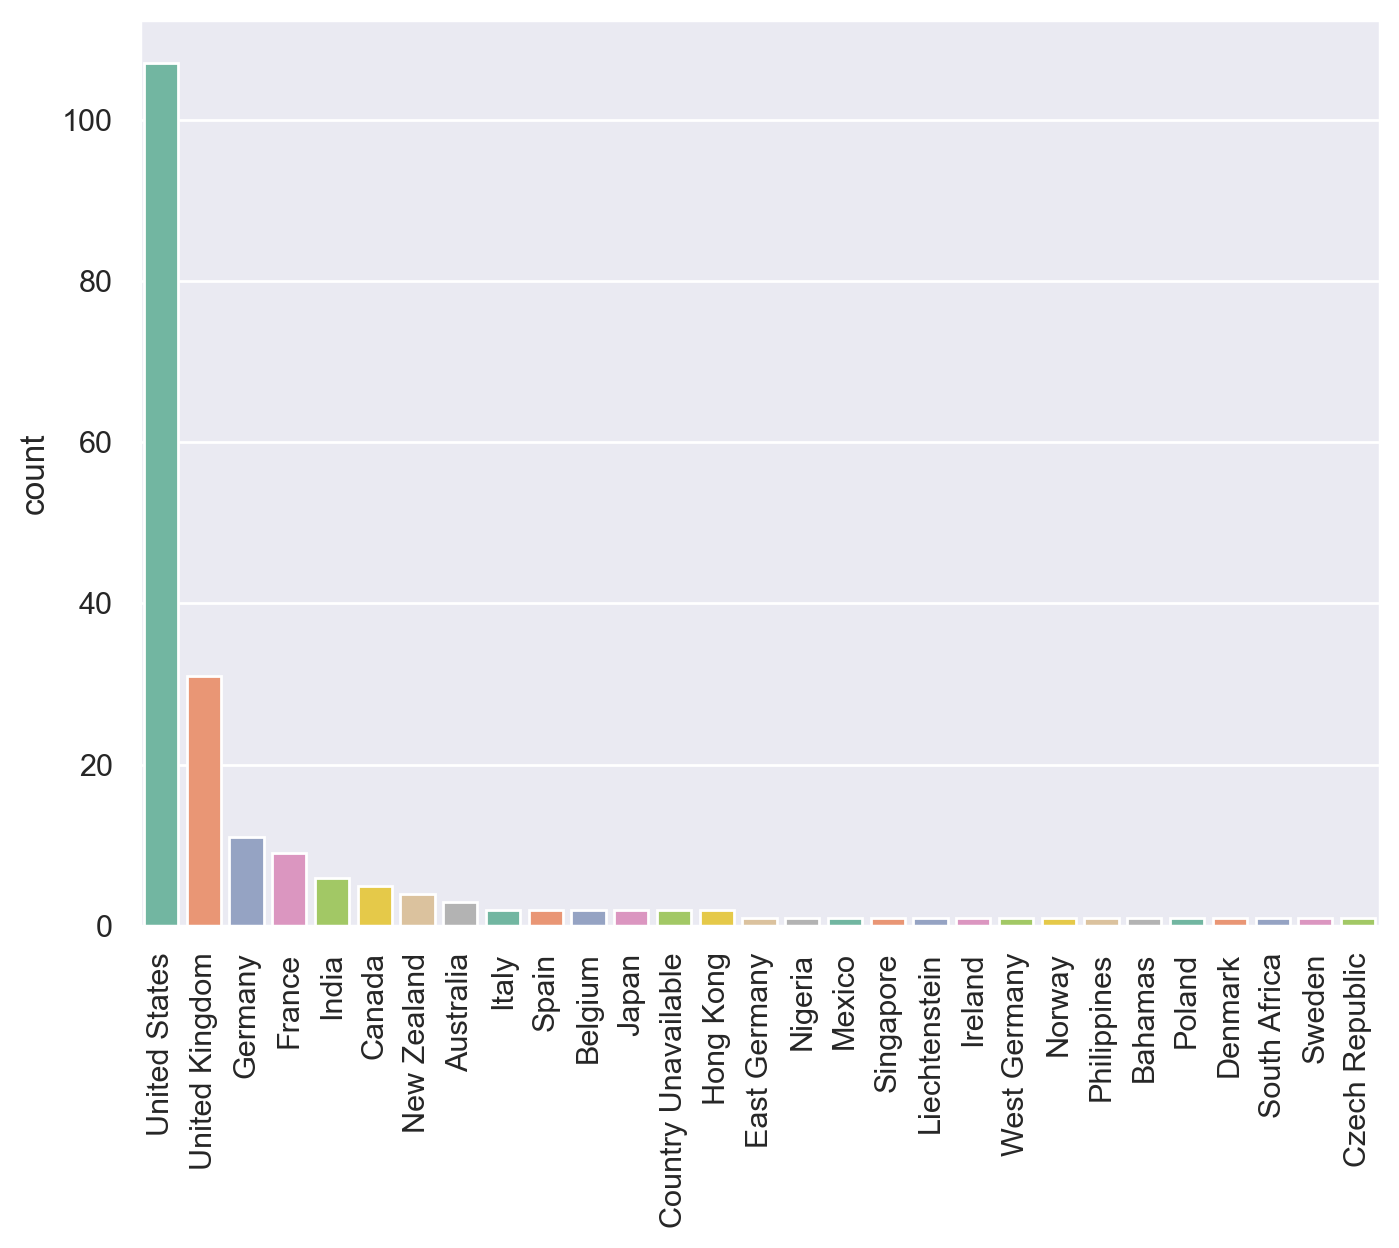

In [559]:
fig ,ax =plt.subplots(figsize=(8,6),dpi=200)
sns.set(style='darkgrid')
sns.countplot(x=top_country,order=top_country.value_counts().index,palette='Set2')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='count', ylabel='Released_Year'>

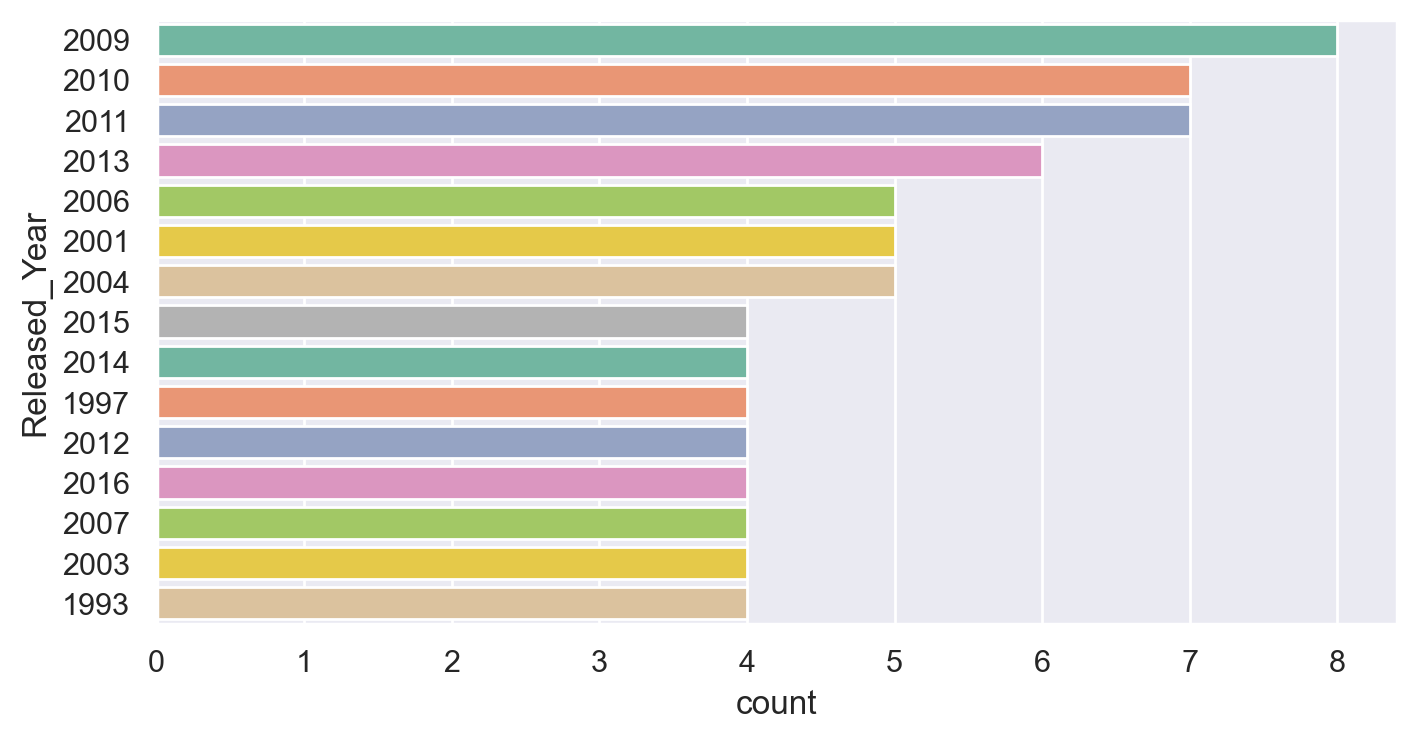

In [560]:
fig ,ax =plt.subplots(figsize=(8,4),dpi=200)
sns.set(style='darkgrid')
sns.countplot(y='Released_Year',data=joindf,order=joindf.Released_Year.value_counts().index[:15],palette='Set2')

In [561]:
joindf.country.str.split(',',expand=True).stack().reset_index(level=1,drop=True).str.strip().value_counts()

United States          107
United Kingdom          31
Germany                 11
France                   9
India                    6
Canada                   5
New Zealand              4
Australia                3
Italy                    2
Spain                    2
Belgium                  2
Japan                    2
Country Unavailable      2
Hong Kong                2
East Germany             1
Nigeria                  1
Mexico                   1
Singapore                1
Liechtenstein            1
Ireland                  1
West Germany             1
Norway                   1
Philippines              1
Bahamas                  1
Poland                   1
Denmark                  1
South Africa             1
Sweden                   1
Czech Republic           1
dtype: int64

In [566]:
countries={}
def spliter(df,col):
    val=list(df[col])
    for i in val:
        i=list(i.split(','))
        if len(i)==1:
            if(i in list(countries.keys())):
                countries[i] +=1
                
            else:
                countries[i[0]]=1
        else:
            for j in i:
                if(j in list(countries.keys())):
                    countries[j] +=1
                
                else:
                    countries[j] =1


spliter(joindf,'country')

In [575]:
fin={}

for c,no in countries.items():
    c=c.replace(' ','')
    if c in list(fin.keys()):
        fin[c]+=no
    else:
        fin[c]=no
        
fin={k:v for k,v in sorted(fin.items() , key=lambda x: x[1], reverse=True)}
fin

{'UnitedStates': 22,
 'UnitedKingdom': 13,
 'Germany': 11,
 'France': 9,
 'Canada': 5,
 'Australia': 3,
 'NewZealand': 2,
 'India': 2,
 'HongKong': 2,
 'Italy': 2,
 'Spain': 2,
 'Japan': 2,
 'Belgium': 2,
 'Poland': 1,
 'Nigeria': 1,
 'Singapore': 1,
 'Denmark': 1,
 'Mexico': 1,
 'Ireland': 1,
 'CountryUnavailable': 1,
 'CzechRepublic': 1,
 'Bahamas': 1,
 'Liechtenstein': 1,
 'SouthAfrica': 1,
 'Sweden': 1,
 'Norway': 1,
 'EastGermany': 1,
 'WestGermany': 1,
 'Philippines': 1}

In [578]:
import plotly.express as xp

